

### Q-matrix design in Kalman filter

Q-matrix is the matrix that represents the white noise in the processing (predict) steps. The impact of Q:

- If Q is too small, the filter will be overconfident and will give less weight to the measurement.
- If Q is too large, the filter will more easily believe the noise from estimation.

In this design, a 3rd Newton kinematic model has Q in discretization:


$$
Q = \int_{0}^{dt} F(t)Q_cF^T(dt)dt
$$

$$
F = \begin{bmatrix} 1 & dt & \frac{dt^2}{2} \\ 0 & 1 & dt \\ 0 & 0 & 1 \end{bmatrix}
$$

The Q_c is the continuous white noise covariance matrix. The Q_c is a 3x3 matrix, and the diagonal elements are the variance of the white noise in the position, velocity, and acceleration. The off-diagonal elements are zero. The Q_c is a constant matrix.

$$
Q_c = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 1 \end{bmatrix} \sigma_{spectral}
$$

Solved we get:

$$
Q = \begin{bmatrix} \frac{dt^5}{20} & \frac{dt^4}{8} & \frac{dt^3}{6} \\ \frac{dt^4}{8} & \frac{dt^3}{3} & \frac{dt^2}{2} \\ \frac{dt^3}{6} & \frac{dt^2}{2} & dt \end{bmatrix} \sigma_{spectral}
$$


Please refer to the mentioned pages for more details.

Refer to "Kalman and Bayesian Filters in Python" page 246 and "Estimation with Applications to Tracking and Navigation" page 270.
$$
Refer to Kalman and Bayesian fliters in Python page 246 and Estimation with applicaitons to tracking and navigation page 272

### Replay Analysis

In [40]:
import requests
import pandas as pd
import json
import numpy as np

url = 'http://localhost:8000/replay/13/?start_date=2024-02-06%2010%3A00%3A00&end_date=2024-02-06%2010%3A20%3A00'  # Replace this with your actual endpoint URL
response = requests.get(url)

if response.status_code == 200:
    print("Request was successful.")
    data = response.json()  # Convert response to JSON format
    df = pd.read_json(data, orient='records')
else:
    print("Request failed. Status code:", response.status_code)

df['se_h'] = np.sqrt(df['cov_east_h'] + df['cov_east_h'])
df['se_t'] = np.sqrt(df['cov_east_t'] + df['cov_east_t'])

Request was successful.


C:\Users\ZOZN109\AppData\Local\Temp\ipykernel_43716\2631634343.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(data, orient='records')


In [53]:
df.keys()

Index(['timestamp', 'sensor_type', 'sensor_id', 'dt', 'latitude_h',
       'longitude_h', 'latitude_t', 'longitude_t', 'east_h', 'north_h',
       'east_t', 'north_t', 'speed', 'heading_h', 'heading_t', 'acceleration',
       'rate_of_turn', 'orientation', 'lag', 'raw_east', 'raw_north',
       'raw_speed', 'raw_heading', 'cov_east_h', 'cov_north_h', 'cov_east_t',
       'cov_north_t', 'cov_speed', 'cov_heading_h', 'cov_heading_t',
       'raw_longitude', 'raw_latitude', 'se_h', 'se_t', 'speed_sde'],
      dtype='object')

In [42]:
df[df['sensor_type'] == 'Beacon']

,timestamp,sensor_type,sensor_id,dt,latitude_h,longitude_h,latitude_t,longitude_t,east_h,north_h,...,cov_north_h,cov_east_t,cov_north_t,cov_speed,cov_heading_h,cov_heading_t,raw_longitude,raw_latitude,se_h,se_t
22,2024-02-06 10:02:43+00:00,Beacon,8068,1.0,50.010248,2.876273,50.012397,2.876331,3.811233e+06,3.013421e+06,...,94.370870,135.014613,606.053457,0.367559,11.357130,15.923515,2.876281,50.010176,14.040671,16.432566
47,2024-02-06 10:05:51+00:00,Beacon,8116,9.0,50.145947,2.871826,50.147591,2.870962,3.812364e+06,3.028485e+06,...,99.691196,8585.491174,47739.221597,8.378746,53.577586,61.964898,2.871829,50.145945,14.127100,131.038095
58,2024-02-06 10:07:01+00:00,Beacon,2586,4.0,50.189754,2.869903,50.200128,2.865809,3.812695e+06,3.033352e+06,...,98.895212,597.648521,11976.934012,1.933970,28.073992,39.889699,2.869923,50.189655,14.038442,34.573068
89,2024-02-06 10:10:43+00:00,Beacon,2587,1.0,50.306911,2.890692,50.310637,2.892805,3.815420e+06,3.046188e+06,...,83.597419,90.686129,465.615851,0.374820,14.094766,22.732094,2.890420,50.306304,13.565239,13.467452
100,2024-02-06 10:12:01+00:00,Beacon,8117,4.0,50.345324,2.936589,50.346280,2.937779,3.819080e+06,3.050128e+06,...,97.864184,4437.366442,3337.650023,1.922531,28.121443,39.900212,2.936593,50.345313,13.999688,94.205801
129,2024-02-06 10:15:28+00:00,Beacon,8118,1.0,50.469963,2.975774,50.475034,2.977971,3.823169e+06,3.063671e+06,...,86.671531,83.652308,653.737165,0.362342,14.060396,22.716665,2.975561,50.469305,13.737546,12.934629
149,2024-02-06 10:17:57+00:00,Beacon,8119,5.0,50.542698,3.066816,50.546335,3.067620,3.830357e+06,3.071117e+06,...,96.194591,43950.664927,23969.319693,2.697265,28.725439,40.876582,3.066561,50.542654,13.140427,296.481584
157,2024-02-06 10:18:51+00:00,Beacon,2590,8.0,50.555657,3.115169,50.557812,3.120339,3.833902e+06,3.072230e+06,...,99.641070,24823.155915,12244.786201,6.716279,48.138230,56.260458,3.115154,50.555648,14.112774,222.814523
166,2024-02-06 10:19:51+00:00,Beacon,2588,8.0,50.571312,3.165584,50.573408,3.178642,3.837618e+06,3.073631e+06,...,99.698139,30831.580478,6255.126997,6.695274,48.099306,56.256029,3.165535,50.571302,14.108901,248.320682


In [55]:
df[df['sensor_type'] == 'GNSS'][['heading_h','orientation']]

,heading_h,orientation
0,18.042982,-15.171228
1,18.042568,148.861732
2,7.515566,183.351127
3,7.400924,211.136414
4,3.714076,171.849716
...,...,...
163,72.709096,152.637748
164,77.175803,184.299140
165,78.738903,145.882930
167,82.920027,227.103351


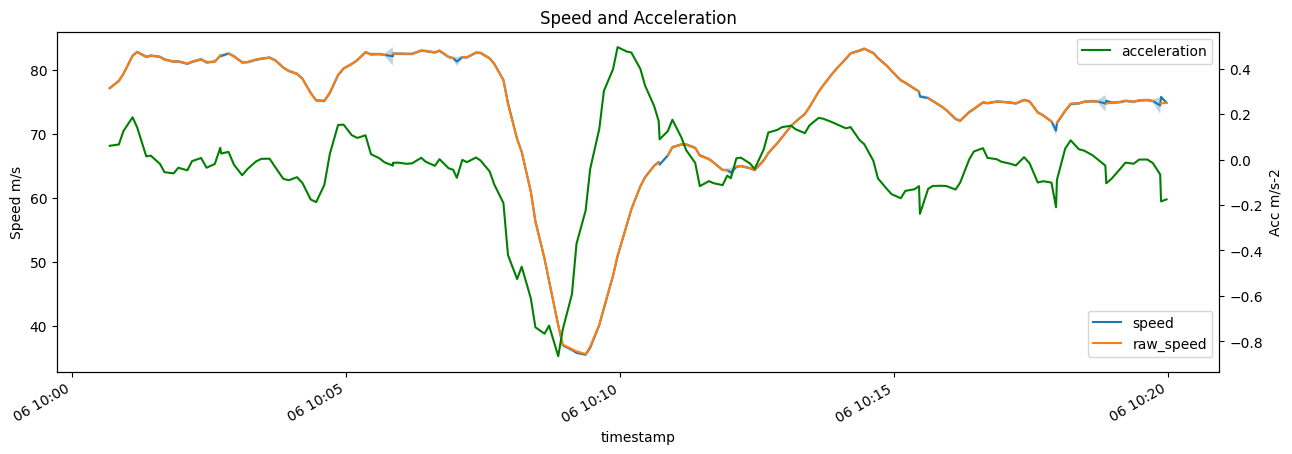

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Your existing code
n=5
m=200

fig, ax1 = plt.subplots(figsize=(15, 5))
ax2 = ax1.twinx()
df['speed_sde'] = np.sqrt(df['cov_speed'])

df.iloc[n:m].plot(x='timestamp', y=['speed', 'raw_speed'], kind='line', ax=ax1)
ax1.fill_between(df['timestamp'].iloc[n:m], df['speed'].iloc[n:m] - 0.5 * df['speed_sde'].iloc[n:m], df['speed'].iloc[n:m] + 0.5 * df['speed_sde'].iloc[n:m], alpha=0.3)

df.iloc[n:m].plot(x='timestamp', y=['acceleration'], kind='line', ax=ax2, color='green')

ax1.set_ylabel('Speed m/s')
ax2.set_ylabel('Acc m/s-2')

# Adjust the legend location
ax1.legend(loc='upper right', bbox_to_anchor=(1, 0.2))
ax1.title.set_text('Speed and Acceleration')

plt.show()


In [45]:
import folium
import numpy as np
import utm
import math
import branca

# Create a map centered at the mean latitude and longitude values
m = folium.Map(location=[df['latitude_h'].iloc[-1], df['longitude_h'].iloc[-1]], zoom_start=13)

# Define a color mapping function or dictionary
color_mapping = {
    45332: 'red',
    45337: 'blue',
    # Add more sensor_id-color mappings as needed
}

# Iterate over the dataframe rows and add markers and circles to the map
for i in range(len(df)):
    sensor_id = df['sensor_id'].iloc[i]
    color = color_mapping.get(sensor_id, 'gray')  # Default to gray if sensor_id is not found in the mapping
    
    # Plot raw records
    folium.Marker([df['raw_latitude'].iloc[i], df['raw_longitude'].iloc[i]], popup=sensor_id, icon=folium.Icon(color=color)).add_to(m)
    
    # In order to compare with raw records, we need to select the right sensors
    if sensor_id == 45332:
        folium.Circle([df['latitude_h'].iloc[i], df['longitude_h'].iloc[i]], radius=df['se_h'].iloc[i], color=color, popup=df['timestamp'].iloc[i], fill=True, fill_color=color).add_to(m)
    elif sensor_id == 45337:
        folium.Circle([df['latitude_t'].iloc[i], df['longitude_t'].iloc[i]], radius=df['se_t'].iloc[i], color=color, popup=df['timestamp'].iloc[i], fill=True, fill_color=color).add_to(m)    
    else:
        folium.Circle([df['latitude_h'].iloc[i], df['longitude_h'].iloc[i]], radius=df['se_h'].iloc[i], color=color, popup=df['timestamp'].iloc[i], fill=True, fill_color=color).add_to(m)

m

### Todo

Analysis:
- Why there are duplicates in beacon (RNE TIS)?
- Where is the reference point of passing event? and how to handle it?

Algorithm:
- KF fine tune
- Handle the case when one GPS is not available. (Orientation estimation is not available. The way to merge beacons also needs to be considered.)

Data:
- Nomad, UK, Tunnel
- OpenRailwayMap

Functions / Features:
- Report: doing quality analysis in pipeline and generate report
- Alert dashboard: realtime quality check
- More visualization
- More documentation
- Production deployment


In [46]:
import folium
import numpy as np
import utm
import math
import branca

# Create a map centered at the mean latitude and longitude values
m = folium.Map(location=[df['latitude_h'].iloc[-1], df['longitude_h'].iloc[-1]], zoom_start=13)

# Define a color mapping function or dictionary
color_mapping = {
    45332: 'red',
    45337: 'blue',
    # Add more sensor_id-color mappings as needed
}

# Iterate over the dataframe rows and add markers and circles to the map
for i in range(len(df)):
    sensor_id = df['sensor_id'].iloc[i]
    color = color_mapping.get(sensor_id, 'gray')  # Default to gray if sensor_id is not found in the mapping
    
    # Plot raw records
    folium.Marker([df['raw_latitude'].iloc[i], df['raw_longitude'].iloc[i]], popup=sensor_id, icon=folium.Icon(color=color)).add_to(m)
    
    # In order to compare with raw records, we need to select the right sensors
    line_coordinates = [[df['latitude_t'].iloc[i], df['longitude_t'].iloc[i]], [df['latitude_h'].iloc[i], df['longitude_h'].iloc[i]]]
    folium.PolyLine(line_coordinates, color='black', weight=2.5).add_to(m)
    
    folium.Circle([df['latitude_h'].iloc[i], df['longitude_h'].iloc[i]], radius=df['se_h'].iloc[i], color=color, popup=df['timestamp'].iloc[i], fill=True, fill_color=color).add_to(m)
    folium.Circle([df['latitude_t'].iloc[i], df['longitude_t'].iloc[i]], radius=df['se_t'].iloc[i], color=color, popup=df['timestamp'].iloc[i], fill=True, fill_color=color).add_to(m)

m